# Cleaning and Exploratory Data Analysis

Here, we will clean and explore the jelly bean estimation data that we collected with the our [survey](https://forms.gle/arF54bKpV1wC1MXU9), with the goal of focusing on questions and methods for further analysis.

First, we import the necessary Python packages and load the data into a pandas DataFrame.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.api import qqplot
import edafuncs as ef

jellybeans = pd.read_csv('./data/jelly_beans.csv', skipinitialspace=True)

Let's have a first view of the data.

In [2]:
jellybeans

,Timestamp,How many jelly beans are in the vase?,"To the nearest minute, how many minutes do you estimate you spent thinking before you decided on your guess?","On a scale of 1 to 5, with 1 being not confident at all and 5 being completely confident, how confident are you in your guess?"
0,4/18/22 23:29,12,0,5
1,4/18/22 17:45,17,1,5
2,4/18/22 21:24,20,0,1
3,4/18/22 17:35,100,1,2
4,4/18/22 20:46,128,1,1
...,...,...,...,...
121,4/19/22 16:10,5000,2,3
122,4/18/22 16:44,8325,0,3
123,4/19/22 5:00,10369,17,4
124,4/18/22 18:48,15300,5,2


## I. Data Cleaning

The column names come directly from the survey and are long and cumbersome. To make these easier to work with, let's replace them with shorter labels.

In [3]:
jellybeans.rename(columns = {'How many jelly beans are in the vase?':'guess',
                             'To the nearest minute, how many minutes do you '
                             'estimate you spent thinking before you decided on your guess?':
                             'time_spent_guessing',
                             'On a scale of 1 to 5, with 1 being not confident at all and 5 '
                             'being completely confident, how confident are you in your guess?':
                             'confidence_level'}, inplace=True)
jellybeans

,Timestamp,guess,time_spent_guessing,confidence_level
0,4/18/22 23:29,12,0,5
1,4/18/22 17:45,17,1,5
2,4/18/22 21:24,20,0,1
3,4/18/22 17:35,100,1,2
4,4/18/22 20:46,128,1,1
...,...,...,...,...
121,4/19/22 16:10,5000,2,3
122,4/18/22 16:44,8325,0,3
123,4/19/22 5:00,10369,17,4
124,4/18/22 18:48,15300,5,2


Let's check the data type of each column to ensure that it is a suitable type for analysis.

In [4]:
jellybeans.dtypes

Timestamp              object
guess                   int64
time_spent_guessing     int64
confidence_level        int64
dtype: object

The data types for the columns we are interested in are all integers, so no changes are necessary.

## II. Exploratory Data Analysis

To start, let's look at summary statistics for the data as a whole.

In [5]:
jellybeans.describe()

,guess,time_spent_guessing,confidence_level
count,126.000000,126.000000,126.000000
mean,1538.492063,1.944444,2.738095
std,3907.943569,2.199293,1.005414
min,12.000000,0.000000,1.000000
25%,517.750000,1.000000,2.000000
50%,750.000000,1.000000,3.000000
75%,1333.250000,2.000000,3.000000
max,40000.000000,17.000000,5.000000


The mean of all 126 estimates is about 1538, which is within 1% of the actual number of jelly beans. On its own, this is quite a remarkable result, especially because the lowest and highest guesses are so extreme that they may not be serious attempts to answer the survey truthfully. The median estimate is 750, which is more than 50% lower than both the mean and the actual number of jelly beans, indicating that the mean might be influenced by some of the extremely high guesses.

The amount of time people say they spent thinking about their answers ranged from 0 minutes to 17 minutes, with a mean of about 2 minutes, a median of 1 minute, and a 75th percentile of 2 minutes. In retrospect, this survey question probably could have been better designed. For example, both people who made snap judgments and people who gave a full minute of thought could have reasonably interpreted that they supposed to respond to the question with 1 minute. And because many people did not spend more than 2 minutes thinking about a guess, the data is less granular than would be ideal. Thus, we will focus our attention on the guess and confidence_level columns instead.

The confidence people had in their guesses ranged from 1 to 5, with mean of 2.74, a median of 3, and a 75th percentile of 3. This indicates that people tended to cluster around 3, with relatively few people having a confidence level higher than that. This makes intuitive sense because it is an estimation task, so we wouldn't expect many people to have complete confidence in their estimates.

Next, let's visualize the distributions of guesses and confidence levels to get a better sense of the data. For the distribution of guesses, let's also plot a dashed line indicating where the actual number of jelly beans was.

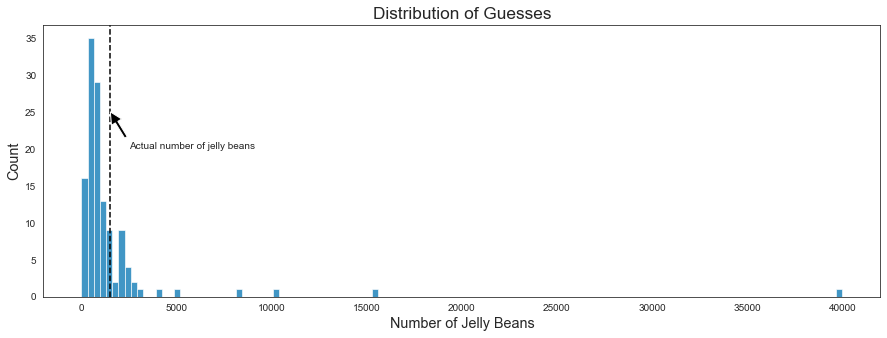

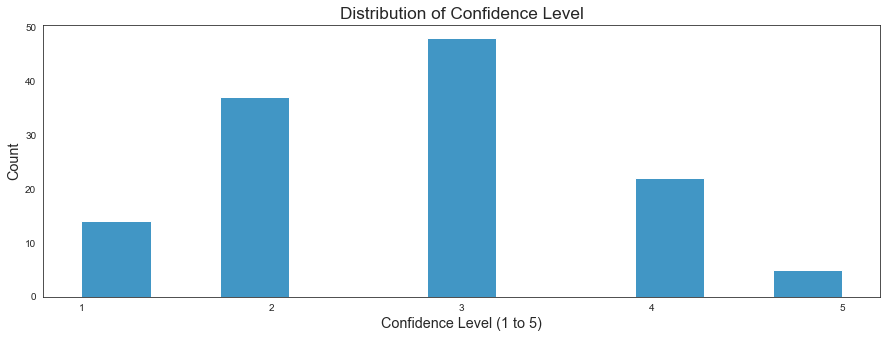

In [6]:
sns.set_style('white')
sns.set_palette('colorblind')

#Plot a histogram of values of guess
labels = ['Distribution of Guesses', 'Number of Jelly Beans']
ef.eda_hist(jellybeans, 'guess', labels)

#Add dashed line for actual number of jellybeans, with annotation and arrow
plt.axvline(x = 1534, linestyle='--', color='black')
plt.annotate('Actual number of jelly beans', xy=(1534, 25), xytext=(2500, 20),
             arrowprops={'facecolor':'black', 'width':3}, backgroundcolor='white')
plt.show()

#Plot a histogram of values of confidence_level
labels = ['Distribution of Confidence Level', 'Confidence Level (1 to 5)']
ef.eda_hist(jellybeans, 'confidence_level', labels)
plt.xticks([1, 2, 3, 4, 5])
plt.show()

These visualizations make the insights above much more clear. The distribution of guesses looks like it might be lognormal as would be predicted by Fechner's Law (see the [jellybeans notebook](https://github.com/tommcd09/jellybeans/blob/main/jellybeans.ipynb) for further discussion) [1-2]. We also get a better sense of how we might be able to group respondents by confidence level. We could group the confidence levels people had into 2 roughly equal bins--a "more confident" bin for levels 3 to 5 and a "less confident" bin for levels 1 and 2.

Let's compute 2 new columns--one with natural log of each guess and one mapping the 5 confidence levels to 2 bins as described above.

In [7]:
jellybeans['log_guess'] = np.log(jellybeans['guess'].values)
jellybeans['confident'] = jellybeans['confidence_level'].map({5:'More Confident',
                                                              4:'More Confident',
                                                              3:'More Confident',
                                                              2:'Less Confident',
                                                              1:'Less Confident'})
jellybeans

,Timestamp,guess,time_spent_guessing,confidence_level,log_guess,confident
0,4/18/22 23:29,12,0,5,2.484907,More Confident
1,4/18/22 17:45,17,1,5,2.833213,More Confident
2,4/18/22 21:24,20,0,1,2.995732,Less Confident
3,4/18/22 17:35,100,1,2,4.605170,Less Confident
4,4/18/22 20:46,128,1,1,4.852030,Less Confident
...,...,...,...,...,...,...
121,4/19/22 16:10,5000,2,3,8.517193,More Confident
122,4/18/22 16:44,8325,0,3,9.027018,More Confident
123,4/19/22 5:00,10369,17,4,9.246576,More Confident
124,4/18/22 18:48,15300,5,2,9.635608,Less Confident


Let's view the distribution of log_guess in a histogram to see if it looks like a normal distribution.

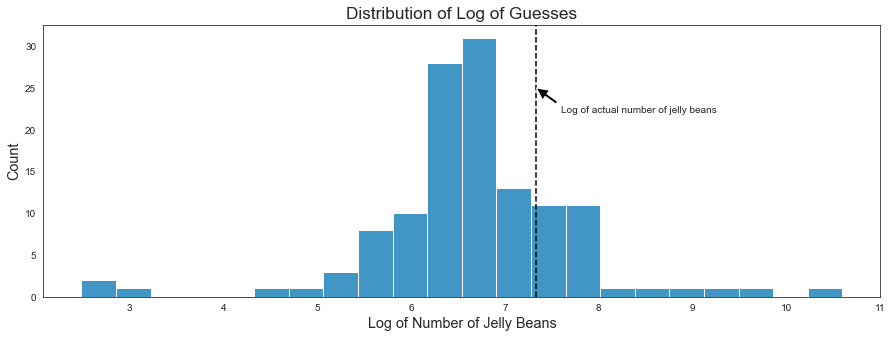

In [8]:
#Plot a histogram of values of log_guess
labels = ['Distribution of Log of Guesses', 'Log of Number of Jelly Beans']
ef.eda_hist(jellybeans, 'log_guess', labels)

#Add dashed line for the natural log of actual number of jellybeans, with annotation and arrow
plt.axvline(x = np.log(1534), linestyle='--', color='black')
plt.annotate('Log of actual number of jelly beans', xy=(np.log(1534), 25),
             xytext=(np.log(2000), 22), arrowprops={'facecolor':'black', 'width':3},
             backgroundcolor='white')
plt.show()

This looks much closer to a normal distribution, though there are long tails. We can explore how close the log transformed data is to a normal distribution by plotting it in a quantile-quantile (Q-Q) plot. A Q-Q plot plots theoretical quantiles from one distribution against sample quantiles from the data. If both sets of quantiles come from the same distribution, the points should conform to a straight line, represented here in red [3]. In the plot below, we plot the standardized log_guess data against a standard normal distribution.

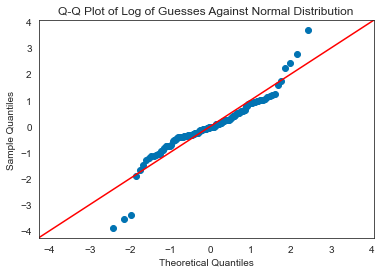

In [9]:
qqplot(jellybeans['log_guess'], fit=True, line='45')
plt.title('Q-Q Plot of Log of Guesses Against Normal Distribution')
plt.show()

The data is fairly close to a normal distribution except for some extreme points on either end. These are likely some of the extreme guess values that we saw earlier.

Let's group the guess column by the confident column to see if we can identify any differences between more and less confident guessers.

In [10]:
jellybeans[['guess', 'confident']].groupby('confident').describe()

guess                                                        \
               count         mean          std   min    25%    50%     75%   
confident                                                                    
Less Confident  51.0  1839.019608  5846.519130  20.0  481.5  671.0   914.5   
More Confident  75.0  1334.133333  1611.509393  12.0  526.0  853.0  1459.5   

                         
                    max  
confident                
Less Confident  40000.0  
More Confident  10369.0

The mean for less confident guessers is higher than the actual number of jelly beans by about 305, while the mean for more confident guessers is lower than the actual number by about 200. However, the data for less confident guessers has more extreme values on the higher end, which is likely influencing the mean. The median for less confident guessers is actually lower than the median for more confident guessers. This might indicate that more confident guessers were slightly better at guessing the actual number of jelly beans, though both groups were still quite a bit off the actual number.

Let's visualize the distribution of log_guess grouped by confidence level. This will be a bit harder to read as a histogram, so let's instead plot it as a KDE plot.

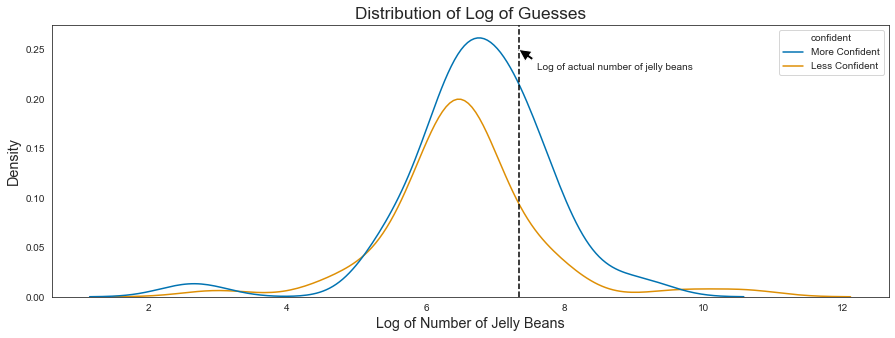

In [11]:
#Plot a KDE plot of values of log_guess grouped by level of confident
labels = ['Distribution of Log of Guesses', 'Log of Number of Jelly Beans']
ef.eda_kde(jellybeans, 'log_guess', labels, hue='confident')

#Add dashed line for the natural log of actual number of jellybeans, with annotation and arrow
plt.axvline(x = np.log(1534), linestyle='--', color='black')
plt.annotate('Log of actual number of jelly beans', xy=(np.log(1534), 0.25),
             xytext=(np.log(2000), 0.23), arrowprops={'facecolor':'black', 'width':3},
             backgroundcolor='white')
plt.show()

This visualization makes the patterns in the two groups more clear. The guesses of more confident guessers appear to be generally higher than those of less confident guessers, though less confident guessers are more spread out and both groups are still quite a bit lower than the correct answer.

At this point, we can see two competing and potentially interesting stories going on here. On the one hand, the mean, which is being influenced by the extreme values in the data set, is remarkably close to the correct answer. If we were to take this example as being representative of all instances where people are performing estimation tasks, then we would perhaps conclude that these extreme values are actually contributing valuable information to the collective wisdom of crowds, and their absence actually makes crowds less wise. However, this is just one instance of a certain subset of people performing an estimation task. So, without performing this experiment many more times under a variety of conditions, it is hard to tell if this result is just a coincidence. If we assume that the extreme guesses we see on either end of the distribution are non-serious or joke guesses, then the result is probably a coincidence because the values of these guesses are arbitrary, aside from being extremely large or extremely small.

The other competing story, and one that seems more plausible, is that the median, which is not as influenced by extreme values, is quite a bit lower than the actual number of jelly beans, though more confident people seem to be a bit closer to the actual value. We therefore might believe that the extreme values in our data are simply noise from people who are not answering the survey seriously, and that the median is actually the better indicator of how the crowd is guessing on this estimation task. Moreover, more confident guessers appear to be a bit more accurate, though we would need to perform hypothesis tests to confirm this.

Up to this point, we have been looking at all of the data. Let's take a closer look at the outliers. There are many ways that outliers get defined in research [4], but for our purposes we can think of outliers as being guess values that are extremely large or small compared to the rest of the data. There are multiple ways to identify outliers [4-5], but one way that would work well for this experiment is to use the Tukey box plot method. We define an inner fence at 1.5 times the interquartile range on the upper and lower ends and an outer fence at 3 times the interquartile range on the upper and lower ends. Any points between the inner and outer fences are considered "possible outliers" and any points beyond the outer fence are considered "probable outliers". Some of the advantages of this test are that it is relatively robust to outliers (i.e., finding one outlier is independent of other outliers) and that it does not require a normal distribution of data [5]. We will use a function from a wonderful [blog post](https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-1-4ece5098b755) by Alicia Horsch to perform this task [5]. Because the data appears to follow a lognormal distribution, we will perform the function on the log_guess column.

In [12]:
outliers_prob, outliers_poss = ef.tukey(jellybeans, 'log_guess')

Let's look at the probable outliers...

In [13]:
jellybeans.iloc[outliers_prob]

,Timestamp,guess,time_spent_guessing,confidence_level,log_guess,confident
0,4/18/22 23:29,12,0,5,2.484907,More Confident
1,4/18/22 17:45,17,1,5,2.833213,More Confident
2,4/18/22 21:24,20,0,1,2.995732,Less Confident
125,4/18/22 18:47,40000,1,1,10.596635,Less Confident


...and the possible outliers.

In [14]:
jellybeans.iloc[outliers_poss]

,Timestamp,guess,time_spent_guessing,confidence_level,log_guess,confident
3,4/18/22 17:35,100,1,2,4.605170,Less Confident
122,4/18/22 16:44,8325,0,3,9.027018,More Confident
123,4/19/22 5:00,10369,17,4,9.246576,More Confident
124,4/18/22 18:48,15300,5,2,9.635608,Less Confident


It is difficult to believe that any of the guesses in these two sets of outliers are serious attempts to answer the survey. More than 100 jelly beans can be easily counted in the photos of the vase, and it seems ridiculous that the vase could hold over 8000 jelly beans, let alone 40,000. The idea that these are not serious guesses is corroborated by unusual values in the other columns. For example, the confidence_level values for all the probable outliers are either 1 or 5, and the possible outliers list also includes some extremely high values for time_spent_guessing.

Once outliers are identified, we could, among other things [4], keep them [4,6], drop them [4,6], recode them with a different value [4,6], transform our data to reduce their impact [4,7-8], or use a different method or model to analyze the data that is more robust to outliers [4,7-8]. As a general rule, we should not drop or alter outliers without a good objective reason, and we should not drop or alter them simply because they do not fit the general trend of our data [9]. In fact, outliers might contain interesting and useful knowledge about the phenomenon being studied [4]. If we could show that any outliers were actually the result of error, or are not a part of the population of interest in our experiment, that would be a good reason to drop or alter them [4,9].

We have already performed a log transformation on the data and there are still extreme values. And while we might think that these are not helpful to us in understanding how people are performing the estimation task, it doesn't necessarily follow that these are errors, or that they are not part of the population of interest in our experiment. This particular estimation task might be more susceptible to people making non-serious guesses because there is no prize or other incentive to guess correctly, but even if a prize or other incentive were available, it is reasonable to think that there would still be some non-serious guesses amongst a group of guesses in most other settings. Thus, there isn't a compelling reason to alter or remove these points from the data outright.

However, we could still minimize the influence of these points in our analysis through our choice of methods if we believe these points ought to not have as much weight. For example, we could perform hypothesis tests on the median, rather than the mean, of each group. Therefore, before we move on to performing tests on the data, let's take a closer look at the data without the outliers to get a better sense of it. First, let's create another DataFrame without the outliers.

In [15]:
outliers = pd.concat([outliers_prob, outliers_poss])
jellybeans_trimmed = jellybeans.drop(outliers)

Now let's look at summary statistics for the data without outliers...

In [16]:
jellybeans_trimmed.describe()

,guess,time_spent_guessing,confidence_level,log_guess
count,118.000000,118.000000,118.000000,118.000000
mean,1014.466102,1.864407,2.728814,6.673335
std,799.990606,1.739021,0.957749,0.705758
min,128.000000,0.000000,1.000000,4.852030
25%,520.500000,1.000000,2.000000,6.254789
50%,750.000000,1.000000,3.000000,6.620073
75%,1236.000000,2.000000,3.000000,7.119492
max,5000.000000,12.000000,5.000000,8.517193


...and compare these to the summary statistics of the full data.

In [17]:
jellybeans.describe()

,guess,time_spent_guessing,confidence_level,log_guess
count,126.000000,126.000000,126.000000,126.000000
mean,1538.492063,1.944444,2.738095,6.657765
std,3907.943569,2.199293,1.005414,1.075795
min,12.000000,0.000000,1.000000,2.484907
25%,517.750000,1.000000,2.000000,6.249489
50%,750.000000,1.000000,3.000000,6.620073
75%,1333.250000,2.000000,3.000000,7.195336
max,40000.000000,17.000000,5.000000,10.596635


We can see a few interesting observations about the data with and without outliers:

* The mean guess for the data without outliers is much lower and much closer to the median, indicating that extremely high values are indeed influencing the mean.
* The range and standard deviation of the guess data without outliers is much narrower, as would be expected.
* The confidence_level column is barely affected by removing the guess outliers. The mean and standard deviation are almost the same, and the percentiles are the same.
* The median guess is exactly the same with and without outliers.

As before, let's visualize the distribution of guesses and confidence levels without outliers.

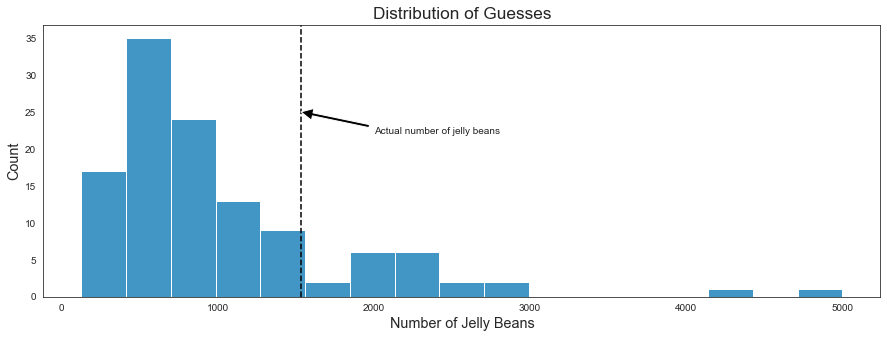

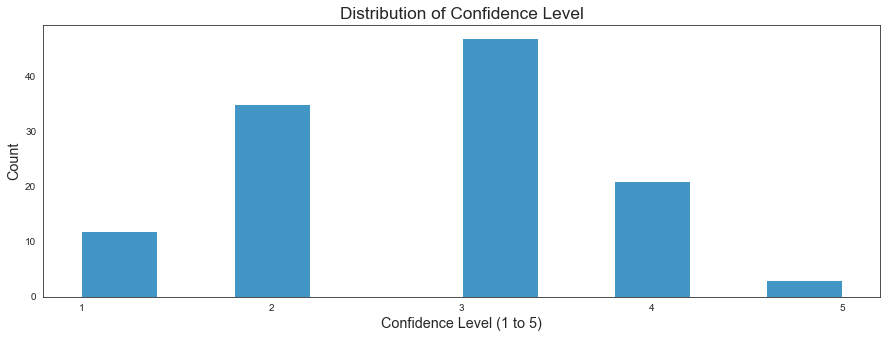

In [18]:
#Plot a histogram of values of guess
labels = ['Distribution of Guesses', 'Number of Jelly Beans']
ef.eda_hist(jellybeans_trimmed, 'guess', labels)

#Add dashed line for actual number of jellybeans, with annotation and arrow
plt.axvline(x = 1534, linestyle='--', color='black')
plt.annotate('Actual number of jelly beans', xy=(1534, 25), xytext=(2000, 22),
             arrowprops={'facecolor':'black', 'width':3}, backgroundcolor='white')
plt.show()

#Plot a histogram of values of confidence_level
labels = ['Distribution of Confidence Level', 'Confidence Level (1 to 5)']
ef.eda_hist(jellybeans_trimmed, 'confidence_level', labels)
plt.xticks([1, 2, 3, 4, 5])
plt.show()

The distribution of guesses now looks much closer to a true lognormal distribution, and the distribution of confidence levels is almost the same with and without the guess outliers.

Let's also visualize the the distribution of log_guess without outliers.

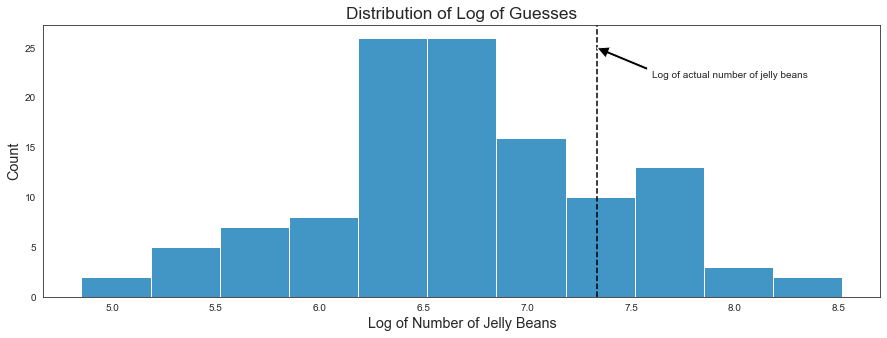

In [19]:
#Plot a histogram of values of log_guess
labels = ['Distribution of Log of Guesses', 'Log of Number of Jelly Beans']
ef.eda_hist(jellybeans_trimmed, 'log_guess', labels)

#Add dashed line for the natural log of actual number of jellybeans, with annotation and arrow
plt.axvline(x = np.log(1534), linestyle='--', color='black')
plt.annotate('Log of actual number of jelly beans', xy=(np.log(1534), 25),
             xytext=(np.log(2000), 22), arrowprops={'facecolor':'black', 'width':3},
             backgroundcolor='white')
plt.show()

The log of guesses looks much closer to a normal distribution without the outliers than with outliers. As we did earlier, we can further confirm this by looking at a Q-Q plot.

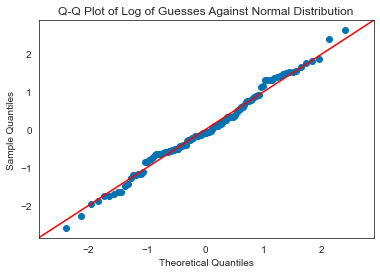

In [20]:
qqplot(jellybeans_trimmed['log_guess'], fit=True, line='45')
plt.title('Q-Q Plot of Log of Guesses Against Normal Distribution')
plt.show()

This distribution looks very close to normal.

As we did earlier, let's group the guess column by the confident column to see if we can identify any differences between more and less confident guessers, this time without outliers...

In [21]:
jellybeans_trimmed[['guess', 'confident']].groupby('confident').describe()

guess                                                        \
               count         mean         std    min    25%    50%     75%   
confident                                                                    
Less Confident  47.0   816.382979  592.451266  128.0  501.5  671.0   873.5   
More Confident  71.0  1145.591549  891.767179  198.0  536.0  853.0  1425.0   

                        
                   max  
confident               
Less Confident  2850.0  
More Confident  5000.0

...and let's compare this the summary statistics for the full data.

In [22]:
jellybeans[['guess', 'confident']].groupby('confident').describe()

guess                                                        \
               count         mean          std   min    25%    50%     75%   
confident                                                                    
Less Confident  51.0  1839.019608  5846.519130  20.0  481.5  671.0   914.5   
More Confident  75.0  1334.133333  1611.509393  12.0  526.0  853.0  1459.5   

                         
                    max  
confident                
Less Confident  40000.0  
More Confident  10369.0

Without outliers, both the mean and the median of the less confident group of guessers are lower and further from the correct number than the mean and median of the more confident group of guessers. Also, the standard deviations of both groups are much lower without outliers than with outliers. And with and without outliers, the medians of each group based on confidence level are exactly the same.

As before, let's visualize the two confidence groups with KDE plots.

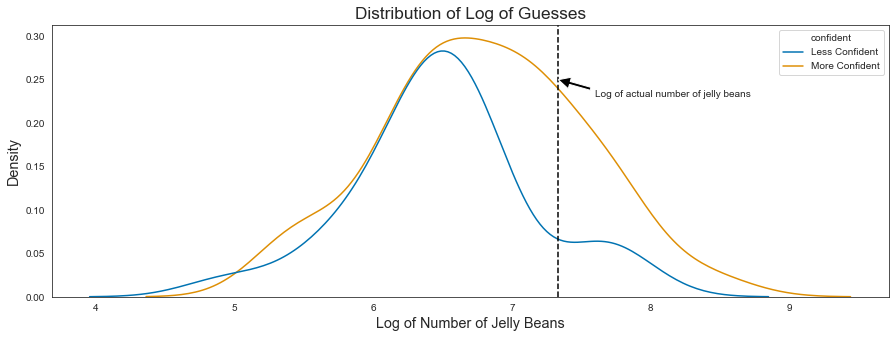

In [23]:
#Plot a KDE plot of values of log_guess grouped by level of confident
labels = ['Distribution of Log of Guesses', 'Log of Number of Jelly Beans']
ef.eda_kde(jellybeans_trimmed, 'log_guess', labels, hue='confident')

#Add dashed line for the natural log of actual number of jellybeans, with annotation and arrow
plt.axvline(x = np.log(1534), linestyle='--', color='black')
plt.annotate('Log of actual number of jelly beans', xy=(np.log(1534), 0.25),
             xytext=(np.log(2000), 0.23), arrowprops={'facecolor':'black', 'width':3},
             backgroundcolor='white')
plt.show()

The distributions of more confident and less confident guessers are less spread out without outliers, but with peak densities still in the same places.

## III. Conclusion

Now that we have thoroughly explored the data, we have identified some interesting questions to explore and have a better idea of how to explore them. First, we can perform a hypothesis test for whether the crowd actually guessed the correct number of jelly beans. And given the presence of highly influential outliers, we should perform this test on both the mean and median of the data to account for influence of the outliers. Second, we should test whether there was actually any difference between how well the more and less confident guessers estimated the number of jelly beans in the jar, again looking at both the mean and the median to account for influence of the outliers.

To perform these tests, we could perform t=tests, calculating t-statistics and computing p-values to determine whether or not we can reject the null hypotheses. However, t-tests assume that the test statistic we are interested in (e.g., the mean or median) follows a normal distribution [10]. We don't necessarily know that with our data. Moreover, using traditional hypothesis testing would lead to some unusual results with this data. For example, because the data is so skewed, if we were to construct 95% confidence intervals around either the mean of the overall data or the means of the data grouped by confidence level, the lower bounds of the confidence intervals would be negative, which is nonsensical in the context of an estimation task like this. While we could log transform the data and remove outliers, a t-test on the log transformed data would be harder to interpret, and we have reservations about removing outliers entirely.

As we already noted, we could look at confidence intervals for the medians instead of the means. However, while estimating the standard error of a mean is straightforward due to the central limit theorem, the central limit theorem does not apply to the standard error of the median [12]. Therefore, instead of performing traditional hypothesis tests, we could instead perform the tests with bootstrap statistics [11-12]. While traditional hypothesis tests estimate sampling distributions using test statistics and a number of assumptions, bootstrapping estimates sampling distributions by resampling the data a large number of times with replacement and then computing the test statistic of interest on each resampled set of data [13-14]. Bootstrapping doesn't require the same test statistics and assumptions that traditional hypothesis testing require [14].

We will explore these questions using these methods in more depth in the [jellybeans notebook](https://github.com/tommcd09/jellybeans/blob/main/jellybeans.ipynb). To conclude the analysis, let's export the clean data.

In [24]:
jellybeans.to_csv('./data/jelly_beans_clean.csv', index=False)

## IV. References

1. Kao AB, Berdahl AM, Hartnett AT, Lutz MJ, Bak-Coleman JB, Ioannou CC, Giam X, Couzin ID. 2018 'Counteracting estimation bias and social influence to improve the wisdom of crowds'. J. R. Soc. Interface 15: 20180130. http://dx.doi.org/10.1098/rsif.2018.0130.
2. Jeans J (1968/1937). Science & Music. Dover Publications.
3. Ford C. August 26, 2015, 'Understanding Q-Q Plots'. University of Virginia Library Research Data Services + Sciences. https://data.library.virginia.edu/understanding-q-q-plots/.
4. Aguinis H, Gottfredson RK, Joo H. 2013 'Best-practice recommendations for defining, identifying, and handling outliers'. Organizational Research Methods, 16(2), 270-301. http://www.hermanaguinis.com/ORMoutliers.pdf.
5. Horsch A. November 22, 2020, 'Detecting And Treating Outliers In Python — Part 1: Hands-On Tutorial On Univariate Outliers'. Towards Data Science. https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-1-4ece5098b755.
6. Horsch A. February 15, 2021, 'Detecting And Treating Outliers In Python — Part 3: Hands-On Tutorial On Treating Outliers — Winsorizing and Imputation'. Towards Data Science. https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-3-dcb54abaf7b0.
7. Grace-Martin K. 'Outliers: To Drop or Not to Drop'. The Analysis Factor. https://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/.
8. Forst J. 'Guidelines for Removing and Handling Outliers in Data'. Statistics By Jim. https://statisticsbyjim.com/basics/remove-outliers/.
9. Pardoe I, Simon L, Young D. 'A Strategy for Dealing with Problematic Data Points'. Penn State Eberly College of Science: Stats 501: Regression Methods. https://online.stat.psu.edu/stat501/lesson/11/11.7.
10. Montgomery, DC (2013). Design and Analysis of Experiments, Eighth Edition. John Wiley & Sons, Inc.
11. Buisson F. November 4, 2021, 'Ditch p-values. Use Bootstrap confidence intervals instead'. Towards Data Science. https://towardsdatascience.com/ditch-p-values-use-bootstrap-confidence-intervals-instead-bba56322b522
12. Zhu Z. August 30, 2020, 'Estimate Standard Error of Median Using the Bootstrap Strategy'. Towards Data Science. https://towardsdatascience.com/how-to-estimate-the-standard-error-of-the-median-the-bootstrap-strategy-ed09cccb838a.
13. MacKinnon JG. 2007 'Bootstrap Hypothesis Testing'. Queen’s Economics Department Working Paper No. 1127. https://ageconsearch.umn.edu/record/273603/files/qed_wp_1127.pdf.
14. Forst J. 'Introduction to Bootstrapping in Statistics with an Example'. Statistics By Jim. https://statisticsbyjim.com/hypothesis-testing/bootstrapping/.